In [11]:
import altair as alt
import pandas as pd

In [2]:
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [3]:
cars = alt.load_dataset('cars')

/Users/EZCorp/.local/share/virtualenvs/week9-0cqsttke/lib/python3.7/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: load_dataset is deprecated. Use the vega_datasets package instead.
  warnings.warn(message, AltairDeprecationWarning)


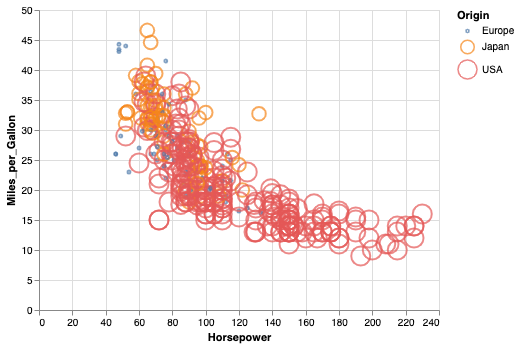

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    size='Origin'
)

In [12]:
humanist_vols = pd.read_csv('web_scraped_humanist_listserv.csv')

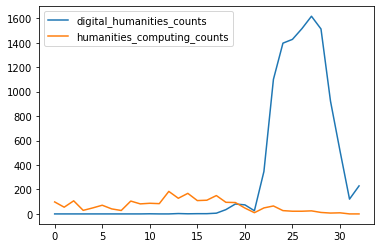

In [13]:
humanist_vols['humanities_computing_counts'] = humanist_vols.text.apply(lambda x: x.count('humanities computing'))
humanist_vols['digital_humanities_counts'] = humanist_vols.text.apply(lambda x: x.count('digital humanities'))
counts = humanist_vols[['digital_humanities_counts', 'humanities_computing_counts']]
counts.plot()

In [17]:
counts.sort_values(by=['digital_humanities_counts'], ascending=False, inplace=True)

/Users/EZCorp/.local/share/virtualenvs/week9-0cqsttke/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


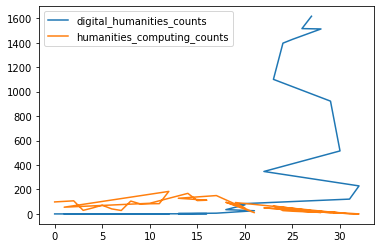

In [18]:
counts.plot()

In [26]:
humanist_vols = humanist_vols[['dates',
 'humanities_computing_counts',
 'digital_humanities_counts']]

In [64]:
vols_melted = humanist_vols.melt(id_vars=['dates'])

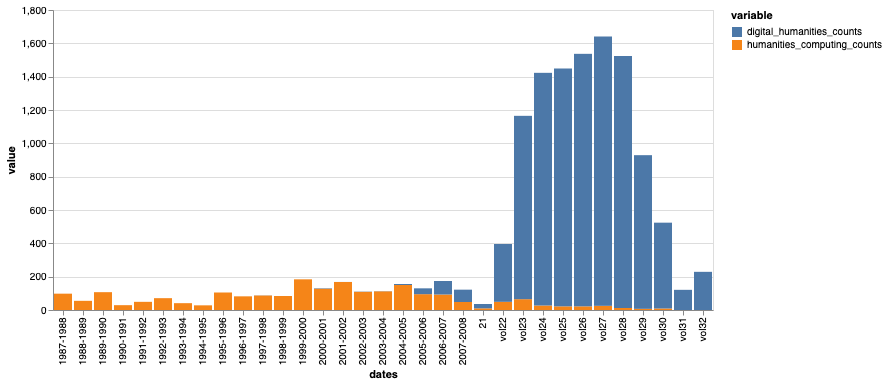

In [33]:
chart1 = alt.Chart(vols_melted).mark_bar().encode(
    x='dates',
    y='value:Q',
    color='variable'
)

chart2 = alt.Chart

In [65]:
early_vols = vols_melted[vols_melted.dates.str.contains('-')]

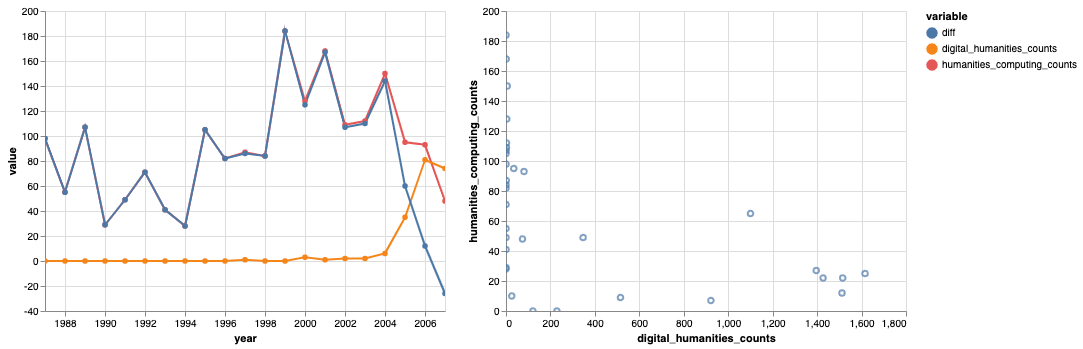

In [68]:
chart1 = alt.Chart(early_vols).mark_line(point=True).encode(
    x='year:T',
    y='value:Q',
    color='variable:N',
    tooltip=['dates', 'value']
).interactive()

chart2 = alt.Chart(humanist_vols).mark_point().encode(
    y='humanities_computing_counts:Q',
    x='digital_humanities_counts:Q',
    tooltip=['humanities_computing_counts','digital_humanities_counts', 'dates']
).interactive()

chart1 | chart2

In [60]:
humanist_vols['diff'] = humanist_vols.humanities_computing_counts - humanist_vols.digital_humanities_counts

/Users/EZCorp/.local/share/virtualenvs/week9-0cqsttke/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
early_vols['year'] = early_vols.dates.str[0:4]

/Users/EZCorp/.local/share/virtualenvs/week9-0cqsttke/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
early_vols['year'] = pd.to_datetime(early_vols.year, format='%Y')

/Users/EZCorp/.local/share/virtualenvs/week9-0cqsttke/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
early_vols.dtypes

dates               object
variable            object
value                int64
year        datetime64[ns]
dtype: object